## Bibliotecas

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score
import matplotlib.pyplot as plt
import networkx as nx

%matplotlib inline
%config InlineBackend.figure_format='svg'

## Leitura do Dataset

In [2]:
dataset = pd.read_csv('/Users/jeanlima/Documents/GitHub/ElectricCurrentRecognition/CreatingDataset/ElectricCurrentDataset.txt')
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,Device
0,0.00,-0.18,-0.25,0.14,0.18,-0.14,0.07,-0.25,-0.04,-0.07,...,1.98,1.49,1.17,1.17,1.20,1.03,0.81,0.46,0.32,Notebook
1,0.07,-0.07,0.07,0.00,0.04,-0.07,0.14,-0.07,0.00,0.32,...,0.11,0.21,0.11,-0.04,-0.07,0.14,0.14,0.11,0.04,Notebook
2,0.07,0.04,-0.28,0.00,0.14,-0.25,-0.07,0.07,-0.04,0.11,...,0.00,0.14,-0.18,0.07,-0.28,0.11,-0.04,0.14,-0.11,Notebook
3,0.00,0.00,0.00,-0.18,0.60,1.42,2.23,1.84,1.66,1.24,...,-0.46,-0.25,-0.07,0.11,0.28,-0.07,0.00,0.32,-0.21,Notebook
4,1.59,1.42,1.20,1.35,1.31,1.10,0.60,0.18,0.00,-0.04,...,-0.07,-0.04,0.14,0.11,-0.07,0.14,0.18,-0.14,-0.11,Notebook


## Holdout 80/20

In [3]:
y = dataset['Device']
x = dataset.drop(['Device'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

## Treinamento knn; k=3

In [4]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

## Teste do modelo

In [5]:
previsaokNN = knn.predict(X_test)

## Métricas de Desempenho

### Matriz de Confusão

In [6]:
print(confusion_matrix(Y_test, previsaokNN))

[[43  0  0  0]
 [ 0 40  0  0]
 [ 0  0 37  0]
 [ 0  0  0 41]]


### Acurácia

In [7]:
accuracy_score(Y_test, previsaokNN)

1.0

### Comparação entre Vizinhos

In [20]:
def dict_amostras_distancias(tupla_distancias_amostras):
    amostras = str(tupla_distancias_amostras[1]).split()
    aux=''
    for i in range(len(amostras)):
        for j in range(len(amostras[i])):
            if amostras[i][j]!='[' and amostras[i][j]!=']':
                aux += amostras[i][j]
        amostras[i] = aux
        aux=''
    for i in range(len(amostras)):
        amostras[i] = int(amostras[i])


    distancias = str(tupla_distancias_amostras[0]).split()
    aux=''
    for i in range(len(distancias)):
        for j in range(len(distancias[i])):
            if distancias[i][j]!='[' and distancias[i][j]!=']' and distancias[i][j]!=' ':
                aux += distancias[i][j]
        distancias[i] = aux
        aux=''
    for i in range(len(distancias)):
        distancias[i] = float(distancias[i])
    return({'Amostras':amostras, 'Distancias':distancias})


In [21]:
pos_amostra = 0
amostra = X_test.loc[pos_amostra]

k = 5
aux_dict = pd.DataFrame.from_dict(dict_amostras_distancias(knn.kneighbors([amostra], n_neighbors=k)))
rotulos = []
for i in aux_dict['Amostras']:
    rotulos.append(dataset.loc[i]['Device'])

aux_dict['Device'] = rotulos    

df_amostras_distancias = aux_dict

df_amostras_distancias

,Amostras,Distancias,Device
0,374,4.253246,Ventilador
1,508,4.377888,Geladeira
2,557,4.486279,Geladeira
3,581,5.600018,Geladeira
4,117,8.400982,Notebook


In [22]:
previsao_individual = knn.predict([amostra])
print(previsao_individual)

['Notebook']


#### Gráfico Amostra + Vizinhos

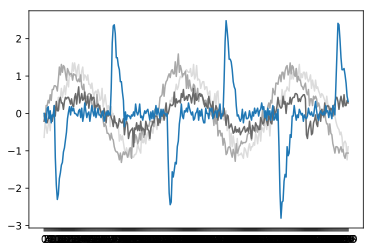

In [39]:

# 3o Vizinho mais próximo
plt.plot(dataset.drop('Device',axis=1).loc[aux_dict['Amostras'][2]], color = 'Gainsboro')
# 2o Vizinho mais próximo
plt.plot(dataset.drop('Device',axis=1).loc[aux_dict['Amostras'][1]], color = 'DarkGray')
# 1o Vizinho mais próximo
plt.plot(dataset.drop('Device',axis=1).loc[aux_dict['Amostras'][0]], color='DimGray')

plt.plot(amostra)
plt.show()

### Teste - Exemplo Externo

In [35]:
teste = [14.17,13.64,13.35,12.75,11.72,11.16,10.34,9.56,8.29,7.05,5.77,4.53,3.01,1.7,1.06,1.28,1.59,1.49,1.88,1.59,1.63,1.81,1.88,1.13,0.53,0.14,-1.1,-1.95,-3.08,-4.21,-5.24,-6.27,-7.3,-8.57,-9.42,-10.2,-10.91,-11.55,-11.9,-12.54,-13.03,-13.18,-13.53,-14.03,-14.24,-14.66,-14.66,-14.73,-14.77,-14.66,-14.91,-14.45,-14.56,-13.88,-13.81,-13.14,-12.54,-11.86,-11.01,-10.27,-9.28,-8.0,-7.05,-5.81,-4.29,-3.01,-1.81,-2.59,-2.62,-2.51,-2.48,-3.01,-3.33,-3.51,-3.36,-3.19,-3.12,-2.8,-2.09,-1.59,-0.78,0.11,0.78,1.7,2.76,3.93,4.71,5.49,6.48,7.69,8.15,8.57,9.35,9.99,10.84,11.19,11.69,12.29,12.89,13.25,13.64,14.13,14.38,14.63,14.49,14.63,14.49,14.52,13.74,13.42,13.1,12.61,11.79,11.01,10.16,9.21,8.11,7.15,5.88,4.18,2.83,1.38,1.1,1.63,1.49,1.7,2.02,1.84,1.81,1.52,1.45,0.92,0.21,-0.25,-1.52,-2.41,-3.36,-4.64,-5.63,-6.94,-7.86,-8.85,-9.85,-10.77,-11.19,-11.48,-12.5,-12.82,-13.1,-13.46,-13.92,-13.92,-14.34,-14.77,-14.77,-14.8,-14.88,-14.77,-14.66,-14.41,-14.24,-13.85,-13.53,-12.93,-12.11,-11.33,-10.45,-9.67,-8.71,-7.33,-6.13,-4.82,-3.75,-2.48,-2.37,-2.27,-2.2,-2.69,-3.01,-3.22,-3.33,-3.15,-3.75,-3.08,-2.87,-2.44,-1.95,-0.96,-0.32,0.5,1.59,2.37,3.36,4.25,5.53,6.02,6.73,7.76,8.71,9.1,9.81,10.24,10.87,11.55,12.01,12.86,13.07,13.88,13.81,13.92,14.56,14.66,14.8,14.49,14.13,14.27,13.67,13.35,12.71,12.08,11.12,10.06,9.35,8.68,7.47,6.06,4.82,3.65,2.09,1.13,1.59,1.42,1.59,1.84,2.05,1.74,1.98,1.45,1.1,0.85,-0.25,-0.89,-1.84,-3.15,-3.9,-5.24,-6.34,-7.33,-8.57,-9.42,-10.2,-10.94,-11.55,-12.08,-12.4,-12.96,-13.35,-13.64,-14.06,-14.17,-14.52,-14.7,-14.63,-14.98,-14.77,-14.95,-14.63,-14.45,-14.17,-13.64,-12.89,-12.4,-11.97,-10.91,-10.16,-9.42,-8.46,-7.05,-5.91,-4.5,-3.15,-2.05,-2.37,-2.3,-2.59,-2.87,-3.19,-3.22,-3.44,-3.19,-2.98,-2.94,-2.94,-1.98,-1.56,-0.81,-0.18,0.85,1.63,2.69]
knn.kneighbors([teste], n_neighbors=5)

(array([[ 9.24497701, 15.55610491, 26.66983877, 39.1018708 , 41.97272329]]),
 array([[ 11, 432, 584, 477, 614]]))

In [40]:
previsao_individual = knn.predict([teste])
print(previsao_individual)

['Microondas']


In [41]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,Device
0,0.00,-0.18,-0.25,0.14,0.18,-0.14,0.07,-0.25,-0.04,-0.07,...,1.98,1.49,1.17,1.17,1.20,1.03,0.81,0.46,0.32,Notebook
1,0.07,-0.07,0.07,0.00,0.04,-0.07,0.14,-0.07,0.00,0.32,...,0.11,0.21,0.11,-0.04,-0.07,0.14,0.14,0.11,0.04,Notebook
2,0.07,0.04,-0.28,0.00,0.14,-0.25,-0.07,0.07,-0.04,0.11,...,0.00,0.14,-0.18,0.07,-0.28,0.11,-0.04,0.14,-0.11,Notebook
3,0.00,0.00,0.00,-0.18,0.60,1.42,2.23,1.84,1.66,1.24,...,-0.46,-0.25,-0.07,0.11,0.28,-0.07,0.00,0.32,-0.21,Notebook
4,1.59,1.42,1.20,1.35,1.31,1.10,0.60,0.18,0.00,-0.04,...,-0.07,-0.04,0.14,0.11,-0.07,0.14,0.18,-0.14,-0.11,Notebook
5,-0.04,0.11,-0.18,0.11,0.18,0.14,-0.14,0.00,0.18,0.00,...,0.14,0.11,0.11,0.00,-0.04,-0.11,0.25,-0.28,-0.18,Notebook
6,0.04,0.14,0.04,0.04,0.00,0.04,0.07,0.21,0.21,-0.07,...,0.07,0.14,0.00,0.07,-0.04,-0.04,-0.18,-0.18,0.11,Notebook
7,-2.20,-1.98,-1.77,-1.49,-1.63,-1.49,-1.42,-1.06,-0.64,-0.78,...,0.04,-0.18,0.00,-0.11,-0.18,0.00,0.07,-0.07,0.00,Notebook
8,-0.11,0.07,-0.43,0.07,-0.07,0.04,-0.07,0.07,-0.11,-0.07,...,0.04,-0.21,-0.04,0.00,-0.07,-0.11,0.04,-0.04,-0.07,Notebook
9,0.07,0.32,0.00,-0.11,0.00,0.04,0.14,-0.11,0.00,-0.11,...,0.21,-0.11,-0.14,-0.07,0.07,0.07,-0.07,-0.18,0.04,Notebook
